In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration-4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/13 19:37:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
file_path = "trip_1.csv"
file1_path = "weather_1.csv"

In [3]:
df = spark.read.csv(file_path, header=True, inferSchema=True)
df_1 = spark.read.csv(file1_path, header=True, inferSchema=True)

02-DU

In [4]:
df.printSchema()

root
 |-- trip_id: integer (nullable = true)
 |-- startdate: string (nullable = true)
 |-- starttime: string (nullable = true)
 |-- stopdata: string (nullable = true)
 |-- stoptime: string (nullable = true)
 |-- bikeid: string (nullable = true)
 |-- tripduration: double (nullable = true)
 |-- from_station_name: string (nullable = true)
 |-- to_station_name: string (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- usertype: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthyear: integer (nullable = true)



In [5]:
df_1.printSchema()

root
 |-- startdate: string (nullable = true)
 |-- Max_Temperature_F: integer (nullable = true)
 |-- Mean_Temperature_F: integer (nullable = true)
 |-- Min_TemperatureF: integer (nullable = true)
 |-- Max_Dew_Point_F: integer (nullable = true)
 |-- MeanDew_Point_F: integer (nullable = true)
 |-- Min_Dewpoint_F: integer (nullable = true)
 |-- Max_Humidity: integer (nullable = true)
 |-- Mean_Humidity: integer (nullable = true)
 |-- Min_Humidity: integer (nullable = true)
 |-- Max_Sea_Level_Pressure_In: double (nullable = true)
 |-- Mean_Sea_Level_Pressure_In: double (nullable = true)
 |-- Min_Sea_Level_Pressure_In: double (nullable = true)
 |-- Max_Visibility_Miles: integer (nullable = true)
 |-- Mean_Visibility_Miles: integer (nullable = true)
 |-- Min_Visibility_Miles: integer (nullable = true)
 |-- Max_Wind_Speed_MPH: integer (nullable = true)
 |-- Mean_Wind_Speed_MPH: integer (nullable = true)
 |-- Max_Gust_Speed_MPH: integer (nullable = true)
 |-- Precipitation_In: double (nullable

In [6]:
df.show(10)

+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+
|trip_id|startdate|starttime|stopdata|stoptime|  bikeid|tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|birthyear|
+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+
|      1| 1/1/2016|     0:36|1/1/2016|    0:48|SEA00480|     734.096|PATH / 9th Ave & ...|Summit Ave & E De...|         SLU-07|        CH-01|Short-Term Pass H...|     M|     null|
|      2| 1/1/2016|     0:43|1/1/2016|    0:54|SEA00392|     644.455|Bellevue Ave & E ...|Dexter Ave N & Al...|          CH-12|       SLU-02|              Member|  Male|     1982|
|      3| 1/1/2016|     0:47|1/1/2016|    1:05|SEA00276|    1078.579|Key Arena / 1st A...| 1st Ave &

In [7]:
df_1.show(10)

+---------+-----------------+------------------+----------------+---------------+---------------+--------------+------------+-------------+------------+-------------------------+--------------------------+-------------------------+--------------------+---------------------+--------------------+------------------+-------------------+------------------+----------------+---------+
|startdate|Max_Temperature_F|Mean_Temperature_F|Min_TemperatureF|Max_Dew_Point_F|MeanDew_Point_F|Min_Dewpoint_F|Max_Humidity|Mean_Humidity|Min_Humidity|Max_Sea_Level_Pressure_In|Mean_Sea_Level_Pressure_In|Min_Sea_Level_Pressure_In|Max_Visibility_Miles|Mean_Visibility_Miles|Min_Visibility_Miles|Max_Wind_Speed_MPH|Mean_Wind_Speed_MPH|Max_Gust_Speed_MPH|Precipitation_In|   Events|
+---------+-----------------+------------------+----------------+---------------+---------------+--------------+------------+-------------+------------+-------------------------+--------------------------+-------------------------+-------

In [8]:
df.columns

['trip_id',
 'startdate',
 'starttime',
 'stopdata',
 'stoptime',
 'bikeid',
 'tripduration',
 'from_station_name',
 'to_station_name',
 'from_station_id',
 'to_station_id',
 'usertype',
 'gender',
 'birthyear']

In [9]:
df.describe().show()

+-------+------------------+---------+---------+--------+--------+--------+------------------+--------------------+--------------------+---------------+-------------+--------------------+------+------------------+
|summary|           trip_id|startdate|starttime|stopdata|stoptime|  bikeid|      tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|         birthyear|
+-------+------------------+---------+---------+--------+--------+--------+------------------+--------------------+--------------------+---------------+-------------+--------------------+------+------------------+
|  count|             48984|    48984|    48984|   48984|   48984|   48984|             48984|               48984|               48984|          48984|        48984|               48984| 48984|             31270|
|   mean|           24492.5|     null|     null|    null|    null|    null|1264.9614109709287|                null|                null|        

In [4]:
import matplotlib.pyplot as plt

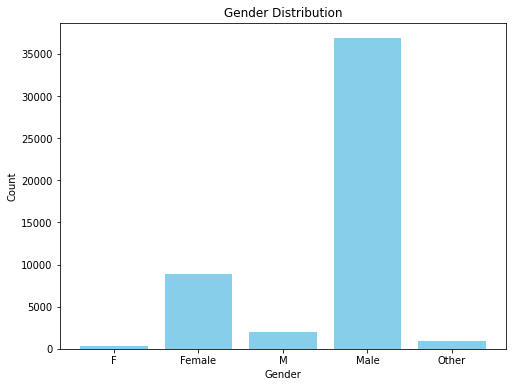

In [11]:
gender_counts = df.groupBy('gender').count().orderBy('gender')


gender_counts_pandas = gender_counts.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts_pandas['gender'], gender_counts_pandas['count'], color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

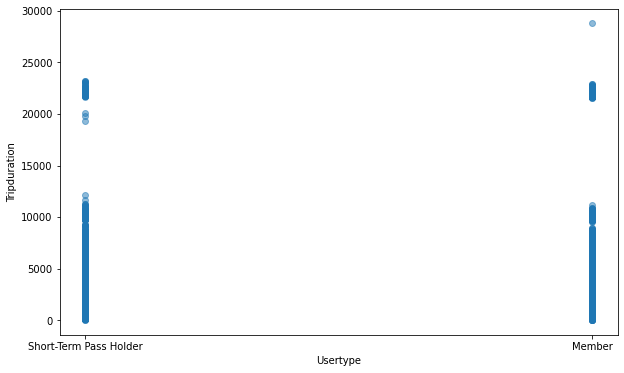

In [12]:
pandas_df = df.select('usertype', 'tripduration').toPandas()


plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['usertype'], pandas_df['tripduration'], alpha=0.5)
plt.xlabel('Usertype')
plt.ylabel('Tripduration')
plt.show()

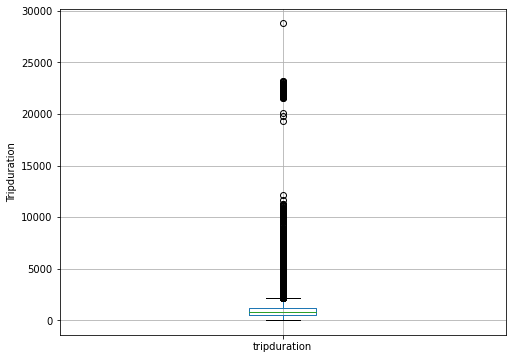

In [13]:
plt.figure(figsize=(8, 6))
pandas_df.boxplot(column='tripduration')

plt.ylabel('Tripduration')
plt.show()

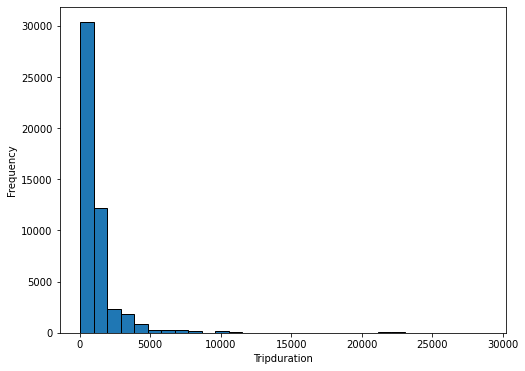

In [14]:
processed_df = df.select('tripduration')

pandas_df = processed_df.toPandas()

plt.figure(figsize=(8, 6))
plt.hist(pandas_df['tripduration'], bins=30, edgecolor='black')

plt.xlabel('Tripduration')
plt.ylabel('Frequency')
plt.show()

In [15]:
df.select('gender').show()

+------+
|gender|
+------+
|     M|
|  Male|
|  Male|
|  Male|
|  Male|
|  Male|
|Female|
|  Male|
|  Male|
|  Male|
|  Male|
|  Male|
|     M|
|  Male|
|  Male|
|     M|
|  Male|
|  Male|
|  Male|
|  Male|
+------+
only showing top 20 rows



03-DP

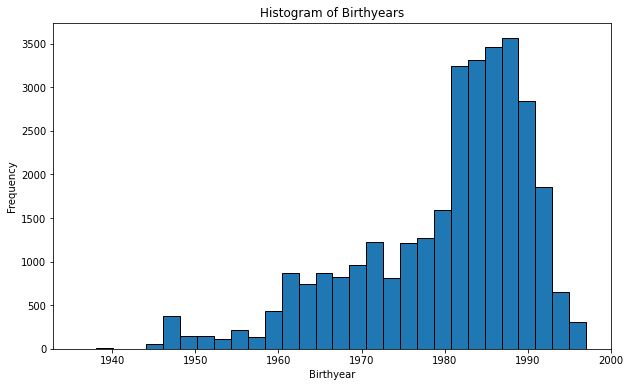

In [16]:
birthyear_column = df.select('birthyear').toPandas()

plt.figure(figsize=(10, 6))
plt.hist(birthyear_column['birthyear'], bins=30, edgecolor='black')
plt.title('Histogram of Birthyears')
plt.xlabel('Birthyear')
plt.ylabel('Frequency')
plt.show()

In [5]:
from pyspark.sql.functions import col, stddev, mean
from pyspark.sql.window import Window

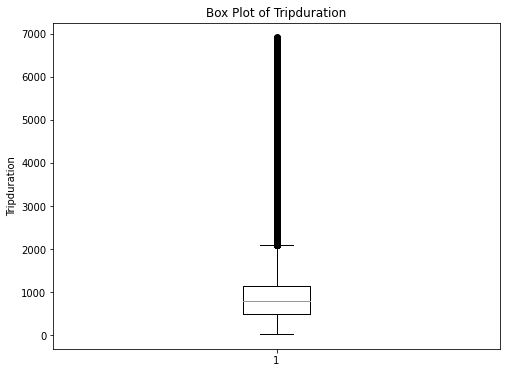

root
 |-- trip_id: integer (nullable = true)
 |-- startdate: string (nullable = true)
 |-- starttime: string (nullable = true)
 |-- stopdata: string (nullable = true)
 |-- stoptime: string (nullable = true)
 |-- bikeid: string (nullable = true)
 |-- tripduration: double (nullable = true)
 |-- from_station_name: string (nullable = true)
 |-- to_station_name: string (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- usertype: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthyear: integer (nullable = true)



In [6]:
tripduration_mean = df.select(mean('tripduration')).first()[0]
tripduration_stddev = df.select(stddev('tripduration')).first()[0]


threshold = 3
df_filtered = df.withColumn('tripduration_Zscore', (col('tripduration') - tripduration_mean) / tripduration_stddev) \
                .filter(col('tripduration_Zscore') <= threshold) \
                .drop('tripduration_Zscore')


tripduration_data = df_filtered.select('tripduration').toPandas()
plt.figure(figsize=(8, 6))
plt.boxplot(tripduration_data['tripduration'])
plt.title('Box Plot of Tripduration')
plt.ylabel('Tripduration')
plt.show()


df_filtered.printSchema()

In [7]:
tripduration_summary = df_filtered.select('tripduration').describe()


tripduration_summary.show()

+-------+------------------+
|summary|      tripduration|
+-------+------------------+
|  count|             48179|
|   mean|1084.4333713858725|
| stddev|1006.9832332421826|
|    min|             34.05|
|    max|          6908.592|
+-------+------------------+



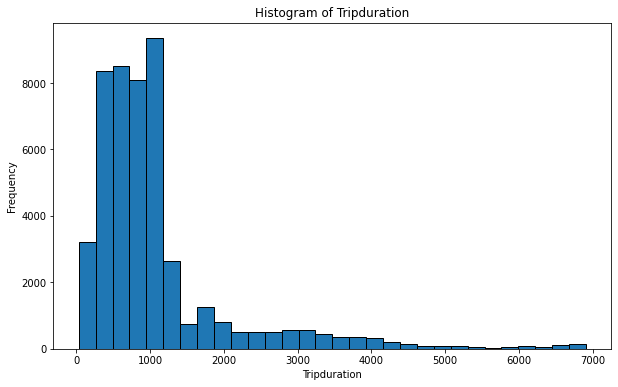

In [8]:
histogram_data = df_filtered.select('tripduration').toPandas()

plt.figure(figsize=(10, 6))
plt.hist(histogram_data['tripduration'], bins=30, edgecolor='black')
plt.title('Histogram of Tripduration')
plt.xlabel('Tripduration')
plt.ylabel('Frequency')
plt.show()

In [21]:
gender_counts = df_filtered.groupBy('gender').count()

gender_counts.show()

+------+-----+
|gender|count|
+------+-----+
|     F|  318|
|Female| 8763|
|     M| 1968|
| Other|  886|
|  Male|36244|
+------+-----+



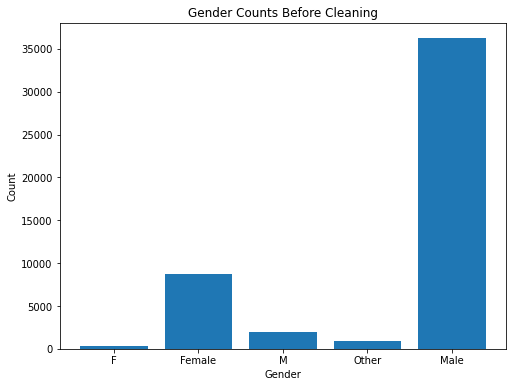

In [22]:
gender_counts_pd = gender_counts.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts_pd['gender'], gender_counts_pd['count'])
plt.title('Gender Counts Before Cleaning')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [8]:
from pyspark.sql.functions import when, count

In [9]:
df = df_filtered.withColumn('gender', 
                             when(col('gender') == 'F', 'Female')
                            .when(col('gender') == 'Female', 'Female')
                            .when(col('gender') == 'M', 'Male')
                            .when(col('gender') == 'Male', 'Male')
                            .otherwise(col('gender')))


gender_counts = df.groupBy('gender').agg(count('*').alias('count'))

gender_counts.show()


gender_counts_pd = gender_counts.toPandas()

+------+-----+
|gender|count|
+------+-----+
|Female| 9081|
| Other|  886|
|  Male|38212|
+------+-----+



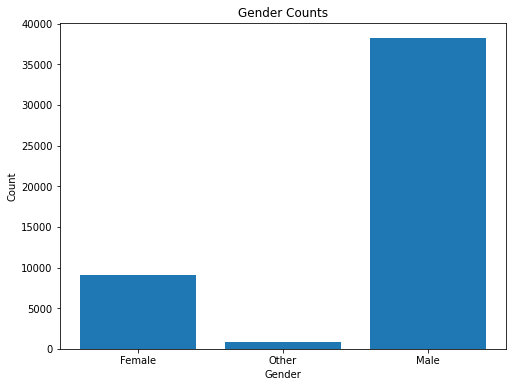

In [25]:
plt.figure(figsize=(8, 6))
plt.bar(gender_counts_pd['gender'], gender_counts_pd['count'])
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [10]:
mean_birthyear = df.select(mean('birthyear')).first()[0]
mean_birthyear = round(mean_birthyear)

df = df.withColumn('birthyear', when(col('birthyear').isNull(), mean_birthyear).otherwise(col('birthyear')))

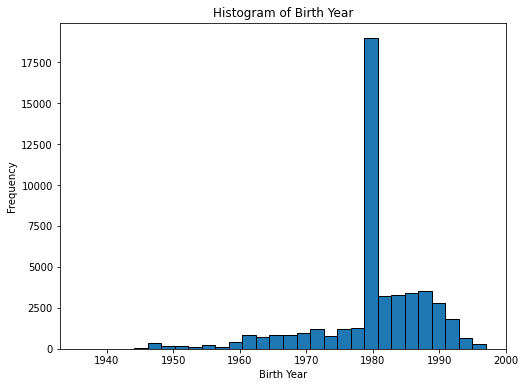

In [11]:
birthyear_data = df.select('birthyear').toPandas()

plt.figure(figsize=(8, 6))
plt.hist(birthyear_data['birthyear'], bins=30, edgecolor='black')
plt.title('Histogram of Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

In [28]:
df.describe().show()

+-------+------------------+---------+---------+--------+--------+--------+------------------+--------------------+--------------------+---------------+-------------+--------------------+------+------------------+
|summary|           trip_id|startdate|starttime|stopdata|stoptime|  bikeid|      tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|         birthyear|
+-------+------------------+---------+---------+--------+--------+--------+------------------+--------------------+--------------------+---------------+-------------+--------------------+------+------------------+
|  count|             48179|    48179|    48179|   48179|   48179|   48179|             48179|               48179|               48179|          48179|        48179|               48179| 48179|             48179|
|   mean|24293.627306502833|     null|     null|    null|    null|    null|1084.4333713858725|                null|                null|        

In [12]:
df = df.withColumn(
    "tripduration_Group",
    when((col("tripduration") >= 34) & (col("tripduration") < 2520), "Short")
    .when((col("tripduration") >= 2520) & (col("tripduration") <= 6909), "Long")
)


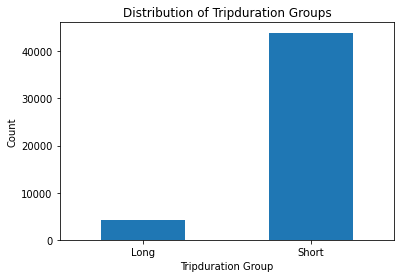

In [13]:
tripduration_grouped_df = df.groupBy("tripduration_Group").count()
tripduration_group_counts_pd = tripduration_grouped_df.toPandas()
tripduration_group_counts_pd.plot.bar(x='tripduration_Group', y='count', rot=0, legend=None)
plt.xlabel('Tripduration Group')
plt.ylabel('Count')
plt.title('Distribution of Tripduration Groups')
plt.show()


In [31]:
df.show()

+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+------------------+
|trip_id|startdate|starttime|stopdata|stoptime|  bikeid|tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|birthyear|tripduration_Group|
+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+------------------+
|      1| 1/1/2016|     0:36|1/1/2016|    0:48|SEA00480|     734.096|PATH / 9th Ave & ...|Summit Ave & E De...|         SLU-07|        CH-01|Short-Term Pass H...|  Male|     1980|             Short|
|      2| 1/1/2016|     0:43|1/1/2016|    0:54|SEA00392|     644.455|Bellevue Ave & E ...|Dexter Ave N & Al...|          CH-12|       SLU-02|              Member|  Male|     1982|             Short|
|    

In [14]:
joined_df = df.join(df_1, on='startdate', how='inner')
joined_df.show(3)
joined_row_count = joined_df.count()
print("joined_row:", joined_row_count)
joined_column_count = len(joined_df.columns)
print("joined_column:", joined_column_count)

24/05/13 19:39:17 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---------+-------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+------------------+-----------------+------------------+----------------+---------------+---------------+--------------+------------+-------------+------------+-------------------------+--------------------------+-------------------------+--------------------+---------------------+--------------------+------------------+-------------------+------------------+----------------+------+
|startdate|trip_id|starttime|stopdata|stoptime|  bikeid|tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|birthyear|tripduration_Group|Max_Temperature_F|Mean_Temperature_F|Min_TemperatureF|Max_Dew_Point_F|MeanDew_Point_F|Min_Dewpoint_F|Max_Humidity|Mean_Humidity|Min_Humidity|Max_Sea_Level_Pressure_In|Mean_Sea_Level_Pressure_In|Min_Sea_Level_Pressure_In|Max_Visibility_Mi

In [33]:
select_columns = ['tripduration_Group', 'usertype', 'gender', 'birthyear', 
                   'Mean_Temperature_F', 'Mean_Humidity', 'Precipitation_In', 'Events']

df_2 = joined_df.select(select_columns)

selected_row_count = df_2.count()
print("selected_row:", selected_row_count)
selected_column_count = len(df_2.columns)
print("selected_column:", selected_column_count)

selected_row: 48179
selected_column: 8


04-DT

4.1

In [15]:
from pyspark.ml.feature import StringIndexer, IndexToString
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import ChiSqSelector

selected_features = ['Mean_Temperature_F','Mean_Humidity', 'Precipitation_In',  'Mean_Visibility_Miles']


indexer = StringIndexer(inputCol='tripduration_Group', outputCol='label')
indexed_df = indexer.fit(joined_df).transform(joined_df)

assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
assembled_df = assembler.transform(indexed_df)

selector = ChiSqSelector(featuresCol="features", outputCol="selectedFeatures", labelCol="label", numTopFeatures=2)
selected_result = selector.fit(assembled_df).transform(assembled_df)


selected_features_df = selected_result.select('selectedFeatures')

selected_feature_names = selected_result.schema["selectedFeatures"].metadata["ml_attr"]["attrs"]["numeric"]

for feature in selected_feature_names:
    print(feature['name'])


Mean_Temperature_F
Mean_Humidity


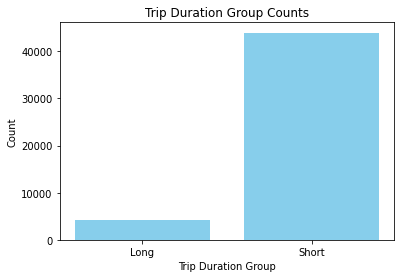

+------------------+-----+
|tripduration_Group|count|
+------------------+-----+
|              Long| 4238|
|             Short|43941|
+------------------+-----+



In [18]:
df_3 = joined_df.select('tripduration_Group', 'Mean_Temperature_F', 'Mean_Humidity')


group_counts = df_3.groupBy('tripduration_Group').count().orderBy('tripduration_Group')


counts_pd = group_counts.toPandas()

plt.bar(counts_pd['tripduration_Group'], counts_pd['count'], color='skyblue')
plt.xlabel('Trip Duration Group')
plt.ylabel('Count')
plt.title('Trip Duration Group Counts')
plt.show()

group_counts.show()

In [16]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [19]:
X_2 = df_3.drop('tripduration_Group')
from pyspark.sql.functions import rand
class_counts = df_3.groupBy('tripduration_Group').count()
min_count = class_counts.selectExpr('min(count)').collect()[0][0]
undersampled_dfs = []
for group in class_counts.collect():
    label = group['tripduration_Group']
    sampled_df = df_3.filter(df_3['tripduration_Group'] == label).orderBy(rand(seed=42)).limit(min_count)
    undersampled_dfs.append(sampled_df)
df_4 = undersampled_dfs[0]
for i in range(1, len(undersampled_dfs)):
    df_4 = df_4.union(undersampled_dfs[i])

+------------------+-----+
|tripduration_Group|count|
+------------------+-----+
|              Long| 4238|
|             Short| 4238|
+------------------+-----+



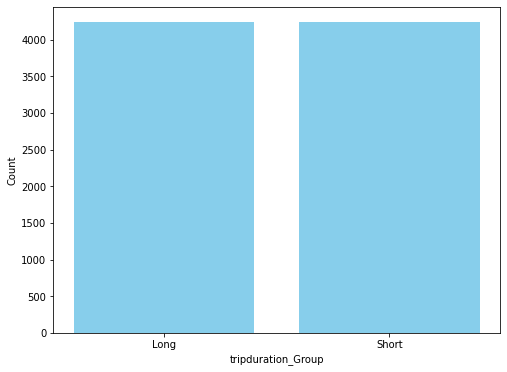

In [20]:
reduce_distribution = df_4.groupBy('tripduration_Group').count().orderBy('tripduration_Group')
reduce_distribution.show()
reduce_distribution_pd = reduce_distribution.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(reduce_distribution_pd['tripduration_Group'],reduce_distribution_pd['count'], color='skyblue')
plt.xlabel('tripduration_Group')
plt.ylabel('Count')
plt.show()

4.2

In [44]:
df_4.describe().show()

+-------+------------------+------------------+------------------+
|summary|tripduration_Group|Mean_Temperature_F|     Mean_Humidity|
+-------+------------------+------------------+------------------+
|  count|              8476|              8476|              8476|
|   mean|              null|61.248938178386034| 64.94242567248702|
| stddev|              null|  9.16467979825562|13.610502207905778|
|    min|              Long|                34|                33|
|    max|             Short|                78|                95|
+-------+------------------+------------------+------------------+



In [21]:
from pyspark.sql.functions import  log10, skewness, stddev

In [22]:
temp_skew = df_4.agg(skewness('Mean_Temperature_F')).collect()[0][0]
print("Skewness of Mean_Temperature_F column:", temp_skew)

Skewness of Mean_Temperature_F column: -0.6172391407916606


In [23]:
temp_std = df_4.select(stddev(col('Mean_Temperature_F'))).collect()[0][0]
print("Standard deviation of Mean_Temperature_F column:", temp_std)

humidity_std = df_4.select(stddev(col('Mean_Humidity'))).collect()[0][0]
print("Standard deviation of Mean_Humidity column:", humidity_std)

Standard deviation of Mean_Temperature_F column: 9.16467979825562
Standard deviation of Mean_Humidity column: 13.610502207905778


In [24]:
import pyspark.sql.functions as F

In [25]:
df_4 = df_4.withColumn('log_Mean_Temperature_F', log10(col('Mean_Temperature_F')))
df_4 = df_4.withColumn('log_Mean_Humidity', log10(col('Mean_Humidity')))

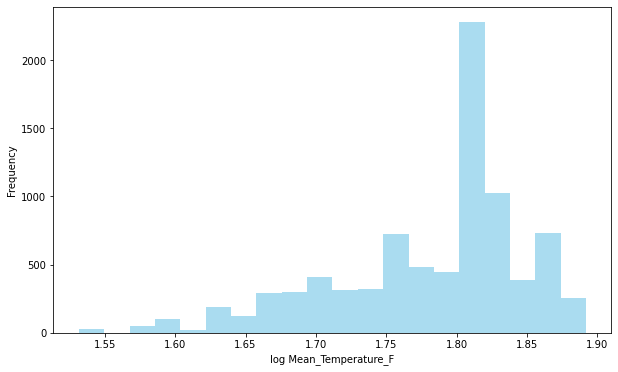

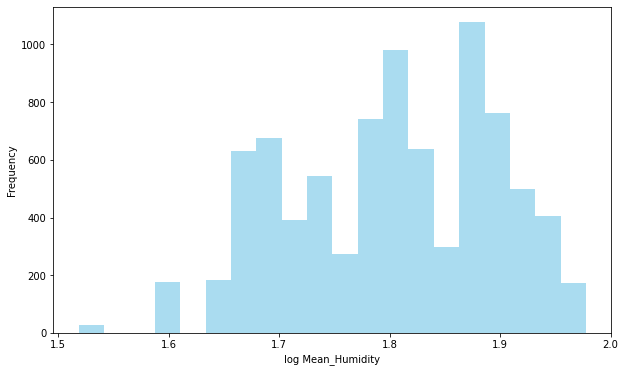

In [55]:
hist_data = df_4.select('log_Mean_Temperature_F', 'log_Mean_Humidity').toPandas()

plt.figure(figsize=(10, 6))
plt.hist(hist_data['log_Mean_Temperature_F'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('log Mean_Temperature_F')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(hist_data['log_Mean_Humidity'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('log Mean_Humidity')
plt.ylabel('Frequency')
plt.show()

In [56]:
df_4.select('log_Mean_Temperature_F').describe().show()

df_4.select('log_Mean_Humidity').describe().show()

+-------+----------------------+
|summary|log_Mean_Temperature_F|
+-------+----------------------+
|  count|                  8476|
|   mean|    1.7817525827787077|
| stddev|   0.06993250796043544|
|    min|    1.5314789170422551|
|    max|    1.8920946026904804|
+-------+----------------------+

+-------+-------------------+
|summary|  log_Mean_Humidity|
+-------+-------------------+
|  count|               8476|
|   mean| 1.8026058228864368|
| stddev|0.09400288074159822|
|    min| 1.5185139398778875|
|    max| 1.9777236052888478|
+-------+-------------------+



In [57]:
df_3.printSchema()

root
 |-- tripduration_Group: string (nullable = true)
 |-- Mean_Temperature_F: integer (nullable = true)
 |-- Mean_Humidity: integer (nullable = true)



7.1 create the test&train

In [26]:
# 选择特征列和目标列
selected_columns = ['Mean_Temperature_F', 'Mean_Humidity', 'tripduration_Group']
df_selected = df_4.select(selected_columns)

# 创建特征向量
assembler = VectorAssembler(
    inputCols=['Mean_Temperature_F', 'Mean_Humidity'],
    outputCol='features')

# 使用特征向量转换数据集
df_assembled = assembler.transform(df_selected)

# 将标签列转换为数值型
indexer = StringIndexer(inputCol='tripduration_Group', outputCol='label')
df_indexed = indexer.fit(df_assembled).transform(df_assembled)

In [27]:

train_ratio = 0.8
seed = 123

train_data, test_data = df_indexed.randomSplit([train_ratio, 1 - train_ratio], seed=seed)

# Count the number of rows in train_data
train_count = train_data.count()

# Count the number of rows in test_data
test_count = test_data.count()

# Print the counts
print("Number of rows in train_data: {}".format(train_count))
print("Number of rows in test_data: {}".format(test_count))


Number of rows in train_data: 6757
Number of rows in test_data: 1719


7.2.1 Logistics Regression

In [28]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [29]:

# Initialize the logistic regression model 初始化 Logistic 回归模型
lr = LogisticRegression(featuresCol='features', labelCol='label')

# train the model 训练模型
lr_model = lr.fit(train_data)

# Make predictions on the test set 在测试集上进行预测
lr_predictions = lr_model.transform(test_data)

# Calculate model accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
lr_accuracy = evaluator.evaluate(lr_predictions)

print("Logistic Regression's Accuracy:", lr_accuracy)


24/05/13 19:40:43 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/13 19:40:43 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


Logistic Regression's Accuracy: 0.900523560209424


7.2.2 C&R Tree

In [31]:
from pyspark.ml.classification import DecisionTreeClassifier

In [54]:
#  Initialize the decision tree model 初始化决策树模型
dt = DecisionTreeClassifier(featuresCol="features", labelCol="label")

# Train the model on the training set 在训练集上训练模型
dt_model = dt.fit(train_data)

# Make predictions on the test set 在测试集上进行预测
predictions = dt_model.transform(test_data)

# Calculate model accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
cr_accuracy = evaluator.evaluate(predictions)
print("C&R Tree's Accuracy:", cr_accuracy)

C&R Tree's Accuracy: 0.9365910413030832


In [40]:
# Get the debug string of the decision tree 获取决策树的调试字符串
tree_debug_string = dt_model._java_obj.toDebugString()

# Print the debugging string of the decision tree. You can view the decision tree structure and rules on the console.打印决策树的调试字符串，可以在控制台查看决策树结构和规则
print(tree_debug_string)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_9a51a62e1577, depth=5, numNodes=21, numClasses=2, numFeatures=2
  If (feature 0 <= 63.5)
   If (feature 0 <= 61.5)
    Predict: 1.0
   Else (feature 0 > 61.5)
    If (feature 1 <= 62.5)
     Predict: 1.0
    Else (feature 1 > 62.5)
     If (feature 1 <= 65.5)
      Predict: 0.0
     Else (feature 1 > 65.5)
      Predict: 1.0
  Else (feature 0 > 63.5)
   If (feature 0 <= 64.5)
    If (feature 1 <= 53.5)
     Predict: 0.0
    Else (feature 1 > 53.5)
     If (feature 1 <= 74.5)
      Predict: 1.0
     Else (feature 1 > 74.5)
      Predict: 0.0
   Else (feature 0 > 64.5)
    If (feature 1 <= 54.5)
     Predict: 0.0
    Else (feature 1 > 54.5)
     If (feature 1 <= 67.5)
      If (feature 1 <= 65.5)
       Predict: 0.0
      Else (feature 1 > 65.5)
       Predict: 1.0
     Else (feature 1 > 67.5)
      Predict: 0.0



7.2.3 C5.0 Tree

In [55]:
C5_dt = DecisionTreeClassifier(featuresCol="features", labelCol="label", impurity="entropy")

C5_dt_model = C5_dt.fit(train_data)

predictions = C5_dt_model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
c5_accuracy = evaluator.evaluate(predictions)
print("C5.0's Accuracy:", c5_accuracy)

C5.0's Accuracy: 0.9255381035485748


In [53]:
# Print the rules of the C5 decision tree model (visualize the decision tree structure) 打印决策树模型的规则（可视化决策树结构）
print("C5 Tree Model Structure:")
print(C5_dt_model.toDebugString)

C5 Tree Model Structure:
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_a5e6a2deee40, depth=5, numNodes=17, numClasses=2, numFeatures=2
  If (feature 0 <= 61.5)
   Predict: 1.0
  Else (feature 0 > 61.5)
   If (feature 0 <= 64.5)
    If (feature 1 <= 53.5)
     Predict: 0.0
    Else (feature 1 > 53.5)
     If (feature 1 <= 64.5)
      Predict: 1.0
     Else (feature 1 > 64.5)
      If (feature 1 <= 65.5)
       Predict: 0.0
      Else (feature 1 > 65.5)
       Predict: 1.0
   Else (feature 0 > 64.5)
    If (feature 1 <= 54.5)
     Predict: 0.0
    Else (feature 1 > 54.5)
     If (feature 1 <= 67.5)
      If (feature 1 <= 65.5)
       Predict: 0.0
      Else (feature 1 > 65.5)
       Predict: 1.0
     Else (feature 1 > 67.5)
      Predict: 0.0



08 - Interpretation

8.1.1

In [56]:
print("Logistic Regression's Accuracy:", lr_accuracy)
print("C&R Tree's Accuracy:", cr_accuracy)
print("C5.0's Accuracy:", c5_accuracy)

Logistic Regression's Accuracy: 0.900523560209424
C&R Tree's Accuracy: 0.9365910413030832
C5.0's Accuracy: 0.9255381035485748


8.1.2 CR predictor importance

In [63]:
from pyspark.sql.functions import desc
from pyspark.sql.types import FloatType
from pyspark.sql.types import StructType, StructField, StringType, DoubleType

In [64]:
# Get feature importance 获取特征重要性
importances = dt_model.featureImportances.toArray()

# Get feature name 获取特征名称
feature_names = ['Mean_Temperature_F', 'Mean_Humidity']

# Create a Feature Importance DataFrame 创建特征重要性 DataFrame
cr_data = [(feature_names[i], float(importances[i])) for i in range(len(feature_names))]
schema = StructType([StructField("Feature", StringType(), True), StructField("Importance", DoubleType(), True)])
feature_importance_df = spark.createDataFrame(cr_data, schema=schema)

# Sort by descending order of importance 按重要性降序排列
feature_importance_df = feature_importance_df.sort("Importance", ascending=False)
feature_importance_df.show()

+------------------+-------------------+
|           Feature|         Importance|
+------------------+-------------------+
|Mean_Temperature_F| 0.8952021862034035|
|     Mean_Humidity|0.10479781379659658|
+------------------+-------------------+



8.2 Visualizing the Data, Results, Models and Patterns

8.2.1 Logistics Regression ROC curve

In [75]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import roc_curve, auc

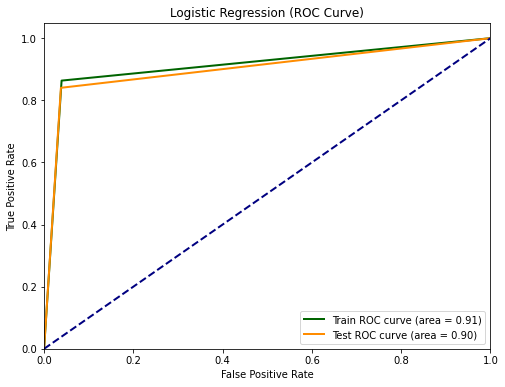

Train Area Under ROC Curve (AUC): 0.9120879063113931
Test Area Under ROC Curve (AUC): 0.9012692417042362


In [78]:
evaluator_train = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol='rawPrediction', metricName='areaUnderROC')
evaluator_test = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol='rawPrediction', metricName='areaUnderROC')

train_predictions = lr_model.transform(train_data)
test_predictions = lr_predictions

train_predictions = train_predictions.select(['prediction', 'label']).rdd.map(lambda row: (float(row['prediction']), float(row['label'])))
test_predictions = test_predictions.select(['prediction', 'label']).rdd.map(lambda row: (float(row['prediction']), float(row['label'])))

train_fpr, train_tpr, _ = roc_curve(train_predictions.map(lambda x: x[1]).collect(), train_predictions.map(lambda x: x[0]).collect())
train_roc_auc = auc(train_fpr, train_tpr)

test_fpr, test_tpr, _ = roc_curve(test_predictions.map(lambda x: x[1]).collect(), test_predictions.map(lambda x: x[0]).collect())
test_roc_auc = auc(test_fpr, test_tpr)

plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='darkgreen', lw=2, label='Train ROC curve (area = %0.2f)' % train_roc_auc)
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (ROC Curve)')
plt.legend(loc="lower right")
plt.show()

print("Train Area Under ROC Curve (AUC):", train_roc_auc)
print("Test Area Under ROC Curve (AUC):", test_roc_auc)

8.2.2 C&R Tree ROC curve

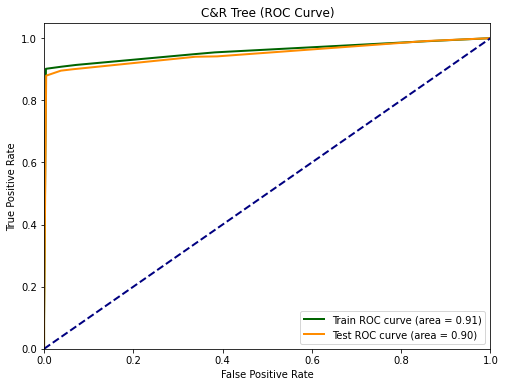

Train Area Under ROC Curve (AUC): 0.9120879063113931
Test Area Under ROC Curve (AUC): 0.9012692417042362


In [81]:
# 在训练集和测试集上分别评估模型
cr_train_predictions = dt_model.transform(train_data)
cr_test_predictions = dt_model.transform(test_data)
                                      
# 获取训练集和测试集的预测结果及概率
cr_train_predictions_prob = cr_train_predictions.select(['probability', 'label']).rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
cr_test_predictions_prob = cr_test_predictions.select(['probability', 'label']).rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))

# 计算训练集和测试集的 ROC 曲线
cr_train_fpr, cr_train_tpr, _ = roc_curve(cr_train_predictions_prob.map(lambda x: x[1]).collect(), cr_train_predictions_prob.map(lambda x: x[0]).collect())
cr_train_roc_auc = auc(train_fpr, train_tpr)

cr_test_fpr, cr_test_tpr, _ = roc_curve(cr_test_predictions_prob.map(lambda x: x[1]).collect(), cr_test_predictions_prob.map(lambda x: x[0]).collect())
cr_test_roc_auc = auc(test_fpr, test_tpr)

# 绘制训练集和测试集的 ROC 曲线在同一图表中
plt.figure(figsize=(8, 6))
plt.plot(cr_train_fpr, cr_train_tpr, color='darkgreen', lw=2, label='Train ROC curve (area = %0.2f)' % cr_train_roc_auc)
plt.plot(cr_test_fpr, cr_test_tpr, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % cr_test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('C&R Tree (ROC Curve)')
plt.legend(loc="lower right")
plt.show()

print("Train Area Under ROC Curve (AUC):", train_roc_auc)
print("Test Area Under ROC Curve (AUC):", test_roc_auc)

8.2.3 C5 Tree ROC curve

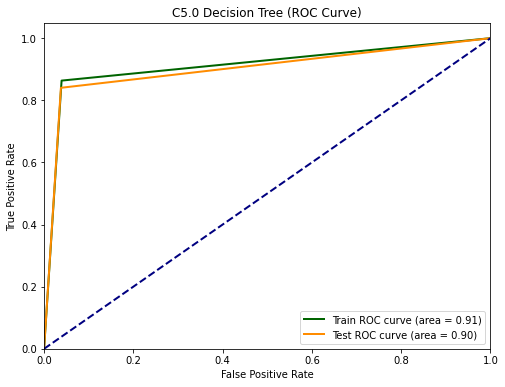

Train Area Under ROC Curve (AUC): 0.9120879063113931
Test Area Under ROC Curve (AUC): 0.9012692417042362


In [83]:
# 在训练集和测试集上分别评估 C5.0 模型
c5_train_predictions = C5_dt_model.transform(train_data)
c5_test_predictions = C5_dt_model.transform(test_data)

# 获取训练集和测试集的预测结果及概率
c5_train_predictions_prob = c5_train_predictions.select(['probability', 'label']).rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
c5_test_predictions_prob = c5_test_predictions.select(['probability', 'label']).rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))

# 计算训练集和测试集的 ROC 曲线
c5_train_fpr, c5_train_tpr, _ = roc_curve(c5_train_predictions_prob.map(lambda x: x[1]).collect(), c5_train_predictions_prob.map(lambda x: x[0]).collect())
c5_train_roc_auc = auc(c5_train_fpr, c5_train_tpr)

c5_test_fpr, c5_test_tpr, _ = roc_curve(c5_test_predictions_prob.map(lambda x: x[1]).collect(), c5_test_predictions_prob.map(lambda x: x[0]).collect())
c5_test_roc_auc = auc(c5_test_fpr, c5_test_tpr)

# 绘制训练集和测试集的 ROC 曲线在同一图表中
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='darkgreen', lw=2, label='Train ROC curve (area = %0.2f)' % train_roc_auc)
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('C5.0 Decision Tree (ROC Curve)')
plt.legend(loc="lower right")
plt.show()

print("Train Area Under ROC Curve (AUC):", train_roc_auc)
print("Test Area Under ROC Curve (AUC):", test_roc_auc)

C5.0 predictor importance

In [84]:
# Get feature importance 获取特征重要性
c5_importances = C5_dt_model.featureImportances.toArray()

# Get feature name 获取特征名称
feature_names = ['Mean_Temperature_F', 'Mean_Humidity']

# Create a Feature Importance DataFrame 创建特征重要性 DataFrame
c5_data = [(feature_names[i], float(c5_importances[i])) for i in range(len(feature_names))]
schema = StructType([StructField("Feature", StringType(), True), StructField("Importance", DoubleType(), True)])
c5_feature_importance_df = spark.createDataFrame(c5_data, schema=schema)

# Sort by descending order of importance 按重要性降序排列
c5_feature_importance_df = c5_feature_importance_df.sort("Importance", ascending=False)
c5_feature_importance_df.show()

+------------------+-------------------+
|           Feature|         Importance|
+------------------+-------------------+
|Mean_Temperature_F| 0.9133759225328784|
|     Mean_Humidity|0.08662407746712172|
+------------------+-------------------+



8.5 Iterations